# Machine learning Project of Regression

# Part 1:

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

# Loading and splitting Dataset 

In [104]:
# Loading Dataset
url = "Part1_data12.csv"
dataset = read_csv(url)

In [ ]:
#Shape : Dimensions of the dataset
print("Dimension = {0:d}*{1:d}".format(dataset.shape[0],dataset.shape[1]))

# Randomly mix the dataset by the function simple

In [ ]:
dataframe_mixed = dataframe.sample(frac=1)
dataframe_mixed

# We take 70% as a training data and 30% as a testing data

In [ ]:
training_dataset = dataframe_mixed[:int(len(dataframe)*0.7)]
training_dataset

testing_dataset  = dataframe_mixed[int(len(dataframe)*0.7):len(dataframe)]
testing_dataset

In [92]:
# Saving training and testing dataset to a cqsv files
training_dataset.to_csv(r'training_dataset.csv', index=False, header=True)
testing_dataset.to_csv(r'testing_dataset.csv'  , index=False, header=True)

# Question 1 Read and visualize the given data.

In [101]:
training_dataset_url = "training_dataset.csv"
testing_dataset_url  = "testing_dataset.csv"

training_dataset = read_csv(training_dataset_url)
testing_dataset  = read_csv(testing_dataset_url)

In [102]:
training_dataset

,x,y
0,5.5,11.176685
1,5.8,16.120831
2,18.6,35.742437
3,17.0,39.136215
4,21.0,45.101353
...,...,...
149,19.8,43.956514
150,14.9,31.782115
151,4.6,10.324609
152,13.8,31.445490


In [103]:
testing_dataset 

,x,y
0,23.1,49.783918
1,20.0,46.242327
2,15.9,40.034630
3,2.7,11.635610
4,15.0,31.275446
...,...,...
61,13.4,25.722744
62,4.2,11.155384
63,4.1,15.153027
64,7.1,19.451904


# 1.4 Give the mean/median/min/max

In [127]:
# Calculation of the mean of x
print("mean(x) = {:.2f}".format(int(pd.DataFrame(testing_dataset['x']).mean())))

# Calculation of the median of x
print("median(x) = {:.2f}".format(int(pd.DataFrame(testing_dataset['x']).median())))

# Calculation of the max of x
print("max(x) = {:.2f}".format(int(pd.DataFrame(testing_dataset['x']).max())))

# Calculation of the min of x
print("min(x) = {:.2f}".format(int(pd.DataFrame(testing_dataset['x']).min())))

mean(x) = 13.00
median(x) = 12.00
max(x) = 23.00
min(x) = 2.00


# Question2: Use scatter plot to represent your training dataset.

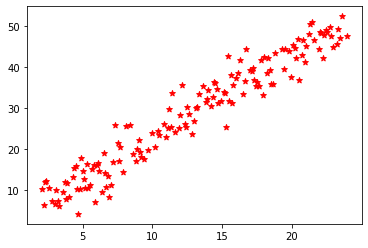

In [142]:
# Plotting the training dataset
plt.scatter(training_dataset['x'], training_dataset['y'], c = 'red', marker = '*')